# Eigenvector and Eigenvalue
we can interprate linear mapping and their associated transformation matrices by performing an **eigen** analysis.

This is eigenvalue equation 

$Av=\lambda v$

A: matrix (should be a **square** matrix) $A \in \mathbb{R}^{n\times n}$

$v$: eigenvectors of A and $x \in \mathbb{R}^n\setminus\{0\}$

$\lambda$: eigenvalues $\lambda \in \mathbb{R}$

In [6]:
import numpy as np 

In [7]:
A = np.array([[1,4],[2,3]])
A

array([[1, 4],
       [2, 3]])

In [8]:
w, v = np.linalg.eig(A)
print("eigenvalue:", w)
print("eigenvector:\n", v)

eigenvalue: [-1.  5.]
eigenvector:
 [[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]


In [9]:
A@v == w@v

array([[False, False],
       [False, False]])

### why the output is false?
Based on above equation, we should get ture. what does happen? 

Multiply **1D array** by **2D array**!!! 

So, we should go back to how to construct a matrix using its eigenvalues and eigenvectors.

**Eigen-Decomposition Formula**
If a square matrix A  has a full set of linearly independent eigenvectors, then:\
$A=VDV^{-1}$

$V$ is the matrix of eigenvectors as columns (shape: $n\times n$)\
$𝐷$ the diagonal matrix of eigenvalues (shape:  $n\times n$)\
$V^{-1}$ is the inverse of $V$



Multiply both sides of  $A=VDV^{-1}$ by $V$ on the **right**:\
$AV=VD$\
And this is the key equation!


In [10]:
np.allclose(A @ v, v @ np.diag(w)) 

True

In [11]:
v@np.diag(w)@np.linalg.inv(v)

array([[1., 4.],
       [2., 3.]])

$V^{-1}AV=D$

In [17]:
D = np.linalg.inv(v)@A@v
D

array([[-1.,  0.],
       [ 0.,  5.]])

In [18]:
np.diag(w)

array([[-1.,  0.],
       [ 0.,  5.]])

In [7]:
v@np.diag(w)

array([[ 0.89442719, -3.53553391],
       [-0.4472136 , -3.53553391]])

Use np.allclose() for numerical comparisons involving floating-point numbers.

You might be wondering why the first equation doesn't work in Python code. Is the equation itself correct, or is my implementation wrong? How can we prove its correctness. 

we can consider for each eigenpair
$Av_i == \lambda_iv_i$
  

#### First column

In [8]:
w[0]*v[:,0] 

array([ 0.89442719, -0.4472136 ])

#### Second column

In [9]:
np.dot(w[1],v[:,1]) 

array([-3.53553391, -3.53553391])

In [10]:
A@v[:,0]

array([ 0.89442719, -0.4472136 ])

In [11]:
A@v[:,1]

array([-3.53553391, -3.53553391])

## Plot 

In [12]:
import matplotlib.pyplot as plt

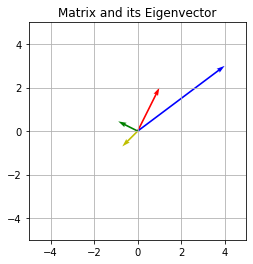

In [13]:
origin = np.zeros((2, A.shape[1]))  # origin for arrows (0,0)
plt.quiver(*origin, A[0, :], A[1, :], angles='xy', scale_units='xy', scale=1, color=['r', 'b'])
plt.quiver(*origin, v[0, :], v[1, :], angles='xy', scale_units='xy', scale=1, color=['g', 'y'])

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid()
plt.gca().set_aspect('equal')
plt.title("Matrix and its Eigenvector")
plt.show()